In [2350]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [2351]:
musicData = pd.read_csv("high_popularity_spotify_data.csv")

In [2352]:
dataIWantToUse = ['energy', 'tempo', 'danceability', 'valence']

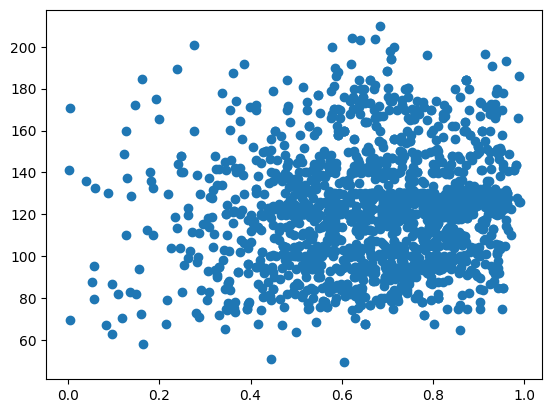

In [2353]:
plt.scatter(musicData['energy'], musicData['tempo'])
# plt.scatter(musicData['danceability'], musicData['valence'])

In [2354]:
energy = musicData['energy']
tempo = musicData['tempo']

In [2355]:
from sklearn.cluster import KMeans

In [2356]:
kmc = KMeans(n_clusters=3)

In [2357]:
kmc

KMeans(n_clusters=3)

In [2358]:
pred = kmc.fit_predict(musicData[['energy', 'tempo']])

In [2359]:
pred

array([1, 2, 2, ..., 2, 2, 0], dtype=int32)

In [2360]:
musicData['cluster'] = pred

In [2361]:
musicData.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


In [2362]:
df0 = musicData[musicData.cluster==0]
df1 = musicData[musicData.cluster==1]
df2 = musicData[musicData.cluster==2]

Text(0, 0.5, 'Tempo')

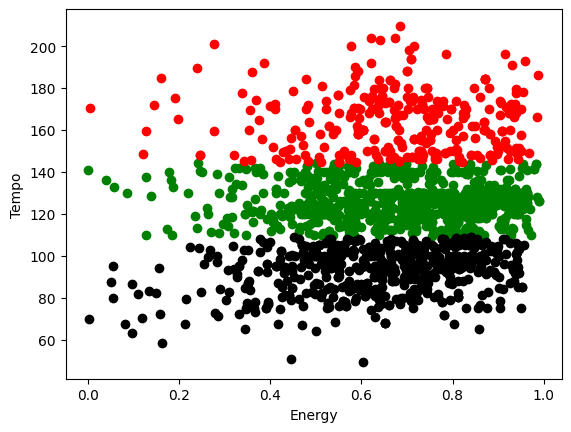

In [2363]:
plt.scatter(df0['energy'], df0['tempo'], color='green')
plt.scatter(df1['energy'], df1['tempo'], color='red')
plt.scatter(df2['energy'], df2['tempo'], color='black')

plt.xlabel('Energy')
plt.ylabel('Tempo')

In [2364]:
pred2 = kmc.fit_predict(musicData[['danceability', 'valence']])

In [2365]:
pred2

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

In [2366]:
musicData['clusterTwo'] = pred2

In [2367]:
musicData.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster,clusterTwo
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,0
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,2


In [2368]:
df0 = musicData[musicData.cluster==0]
df1 = musicData[musicData.cluster==1]
df2 = musicData[musicData.cluster==2]

Text(0, 0.5, 'Valence')

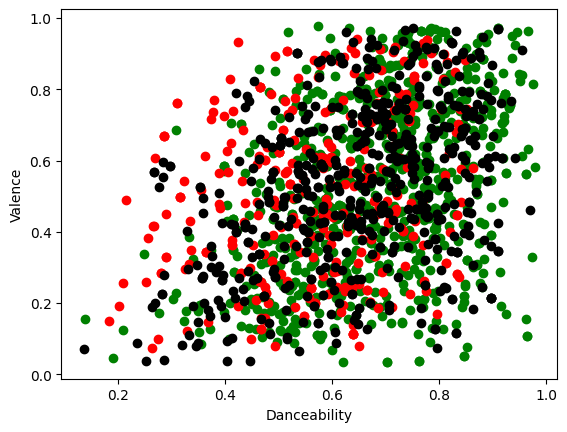

In [2369]:
plt.scatter(df0['danceability'], df0['valence'], color='green')
plt.scatter(df1['danceability'], df1['valence'], color='red')
plt.scatter(df2['danceability'], df2['valence'], color='black')

plt.xlabel('Danceability')
plt.ylabel('Valence')

In [2370]:
rows = musicData.index[-1] 
rounded = round(rows/2)

In [2371]:
rows, rounded

(1685, 842)

In [2372]:
e = energy.size//2
t = tempo.size//2

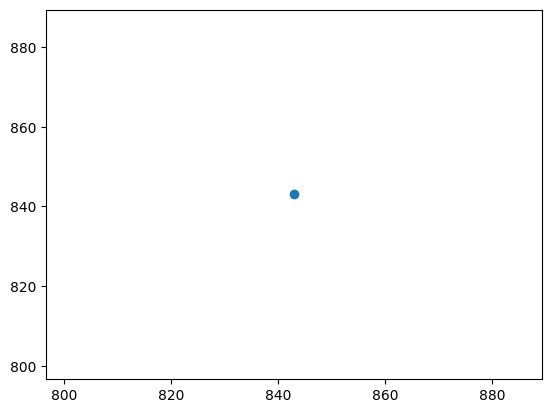

In [2373]:
plt.scatter(e, t)

In [2374]:
from sklearn.preprocessing import MinMaxScaler

In [2375]:
scale = MinMaxScaler()

In [2376]:
scale.fit(musicData[['danceability']])
musicData['danceability'] = scale.transform(musicData[['danceability']])

In [2377]:
scale.fit(musicData[['valence']])
musicData['valence'] = scale.transform(musicData[['valence']])

In [2378]:
musicData

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster,clusterTwo
0,0.592,157.969,0.456702,pop,-7.777,0.1220,0.530322,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,1
1,0.507,104.978,0.724792,pop,-10.171,0.1170,0.427481,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,1
2,0.808,108.548,0.495848,pop,-4.169,0.1590,0.357506,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,0
3,0.910,112.966,0.633452,pop,-4.070,0.3040,0.796438,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2
4,0.783,149.027,0.760380,pop,-4.477,0.3550,0.958651,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.518387,latin,-7.621,0.1020,0.697837,Libianca,5,0.0678,76,https://api.spotify.com/v1/tracks/26b3oVLrRUaa...,spotify:track:26b3oVLrRUaaybJulow9kz,People,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/26b3...,26b3oVLrRUaaybJulow9kz,People,2022-12-06,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,0,2
1682,0.725,105.016,0.682088,latin,-8.315,0.1100,0.525021,Omah Lay,4,0.0941,74,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,spotify:track:1wADwLSkYhrSmy4vdy6BRn,Boy Alone,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/1wAD...,1wADwLSkYhrSmy4vdy6BRn,soso,2022-07-14,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,2,1
1683,0.809,99.005,0.697509,latin,-5.022,0.0765,0.605598,"Davido, FAVE",4,0.0929,69,https://api.spotify.com/v1/tracks/7vKXc90NT5WB...,spotify:track:7vKXc90NT5WBm3UTT4iTVG,Timeless,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/7vKX...,7vKXc90NT5WBm3UTT4iTVG,KANTE (feat. Fave),2023-03-30,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,2,1
1684,0.642,83.389,0.387900,latin,-4.474,0.0686,0.322519,"Future, Drake, Tems",4,0.3400,82,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,spotify:track:

In [2379]:
kmc = KMeans(n_clusters=3)
ypred = kmc.fit_predict(musicData[['danceability', 'valence']])

In [2380]:
ypred

array([2, 1, 2, ..., 0, 2, 1], dtype=int32)

In [2381]:
musicData['cluster'] = ypred

In [2382]:
musicData

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster,clusterTwo
0,0.592,157.969,0.456702,pop,-7.777,0.1220,0.530322,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,1
1,0.507,104.978,0.724792,pop,-10.171,0.1170,0.427481,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,1
2,0.808,108.548,0.495848,pop,-4.169,0.1590,0.357506,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,0
3,0.910,112.966,0.633452,pop,-4.070,0.3040,0.796438,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2
4,0.783,149.027,0.760380,pop,-4.477,0.3550,0.958651,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.518387,latin,-7.621,0.1020,0.697837,Libianca,5,0.0678,76,https://api.spotify.com/v1/tracks/26b3oVLrRUaa...,spotify:track:26b3oVLrRUaaybJulow9kz,People,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/26b3...,26b3oVLrRUaaybJulow9kz,People,2022-12-06,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,0,2
1682,0.725,105.016,0.682088,latin,-8.315,0.1100,0.525021,Omah Lay,4,0.0941,74,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,spotify:track:1wADwLSkYhrSmy4vdy6BRn,Boy Alone,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/1wAD...,1wADwLSkYhrSmy4vdy6BRn,soso,2022-07-14,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,1,1
1683,0.809,99.005,0.697509,latin,-5.022,0.0765,0.605598,"Davido, FAVE",4,0.0929,69,https://api.spotify.com/v1/tracks/7vKXc90NT5WB...,spotify:track:7vKXc90NT5WBm3UTT4iTVG,Timeless,Afro-Latin Party,https://api.spotify.com/v1/audio-analysis/7vKX...,7vKXc90NT5WBm3UTT4iTVG,KANTE (feat. Fave),2023-03-30,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh,0,1
1684,0.642,83.389,0.387900,latin,-4.474,0.0686,0.322519,"Future, Drake, Tems",4,0.3400,82,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,spotify:track:

Text(0, 0.5, 'Valence')

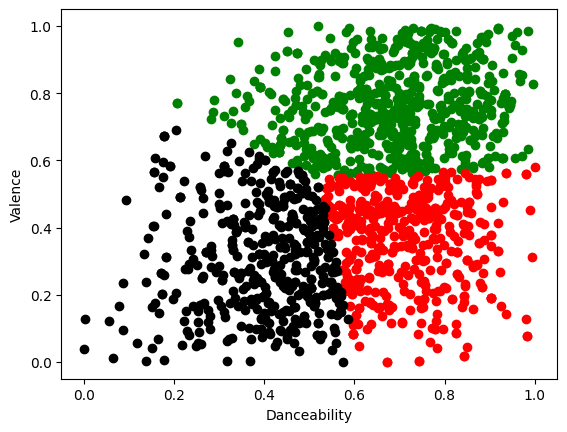

In [2383]:
df0 = musicData[musicData.cluster==0]
df1 = musicData[musicData.cluster==1]
df2 = musicData[musicData.cluster==2]

plt.scatter(df0['danceability'], df0['valence'], color='green')
plt.scatter(df1['danceability'], df1['valence'], color='red')
plt.scatter(df2['danceability'], df2['valence'], color='black')

# plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Danceability')
plt.ylabel('Valence')

In [2384]:
scale.fit(musicData[['energy']])
musicData['energy'] = scale.transform(musicData[['energy']])

In [2385]:
scale.fit(musicData[['tempo']])
musicData['tempo'] = scale.transform(musicData[['tempo']])

In [2386]:
musicData.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster,clusterTwo
0,0.597325,0.677528,0.456702,pop,-7.777,0.122,0.530322,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,1
1,0.511327,0.347125,0.724792,pop,-10.171,0.117,0.427481,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,1
2,0.815862,0.369385,0.495848,pop,-4.169,0.159,0.357506,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,0
3,0.919060,0.396931,0.633452,pop,-4.070,0.304,0.796438,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2
4,0.790569,0.621774,0.760380,pop,-4.477,0.355,0.958651,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2


In [2387]:
kmc = KMeans(n_clusters=3)
ypred = kmc.fit_predict(musicData[['energy', 'tempo']])

In [2388]:
musicData['cluster'] = ypred

In [2389]:
musicData.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster,clusterTwo
0,0.597325,0.677528,0.456702,pop,-7.777,0.122,0.530322,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,1
1,0.511327,0.347125,0.724792,pop,-10.171,0.117,0.427481,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,1
2,0.815862,0.369385,0.495848,pop,-4.169,0.159,0.357506,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,0
3,0.919060,0.396931,0.633452,pop,-4.070,0.304,0.796438,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,2
4,0.790569,0.621774,0.760380,pop,-4.477,0.355,0.958651,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2


Text(0, 0.5, 'Tempo')

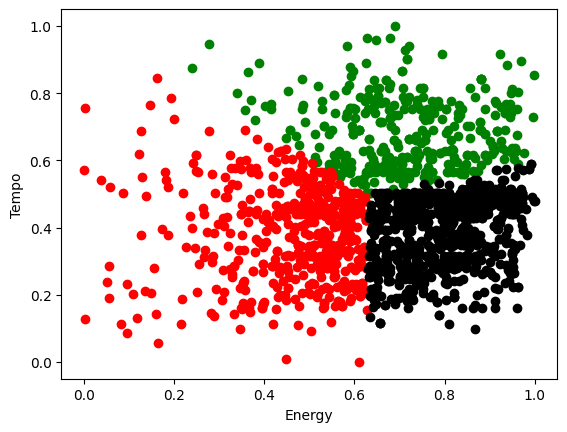

In [2390]:
df0 = musicData[musicData.cluster==0]
df1 = musicData[musicData.cluster==1]
df2 = musicData[musicData.cluster==2]

plt.scatter(df0['energy'], df0['tempo'], color='green')
plt.scatter(df1['energy'], df1['tempo'], color='red')
plt.scatter(df2['energy'], df2['tempo'], color='black')

# plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Energy')
plt.ylabel('Tempo')

In [2391]:
times = range(1, 30)
arr = []

for k in times:
    kmc = KMeans(n_clusters=k)
    kmc.fit(musicData[['energy', 'tempo']])
    arr.append(kmc.inertia_)

In [2392]:
arr

[106.96101371459294,
 66.80914788512244,
 47.01106287335097,
 36.37311385105997,
 29.34233925104292,
 24.07296160514288,
 20.944504567047677,
 18.982072622806832,
 16.19804651386293,
 14.950469533988255,
 13.871460221987052,
 12.7083848258768,
 11.204853251520639,
 10.633545247704216,
 10.599728744444668,
 9.672228156952222,
 9.290367455476968,
 8.277711951879636,
 7.966990945811062,
 7.714768236585403,
 7.192789344327638,
 6.937174644065168,
 6.665696183288476,
 6.360422732890772,
 6.073719191799169,
 5.776306237359244,
 5.592062793870015,
 5.403823142796825,
 5.090995991476177]

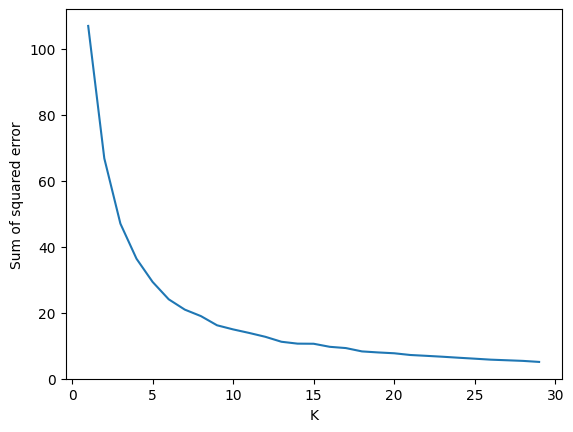

In [2393]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(times, arr)

In [2394]:
def findBestKValue(data, n):
    for _ in range(n):
        kmc = KMeans(n_clusters=n)
        prediction = kmc.fit_predict(musicData[[data]])
    print("model predicted the best value of k to be:", prediction)
    return prediction

In [2395]:
n = 200
answer = findBestKValue('energy', n)

# refit = findBestKValue('energy', n)



model predicted the best value of k to be: [ 75   7 150 ... 150 156 197]


In [2396]:
musicData['deployment'] = answer

In [2397]:
musicData.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,track_popularity,track_href,uri,track_album_name,playlist_name,analysis_url,track_id,track_name,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,cluster,clusterTwo,deployment
0,0.597325,0.677528,0.456702,pop,-7.777,0.122,0.530322,"Lady Gaga, Bruno Mars",3,0.0304,100,https://api.spotify.com/v1/tracks/2plbrEY59Iik...,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/2plb...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,1,75
1,0.511327,0.347125,0.724792,pop,-10.171,0.117,0.427481,Billie Eilish,4,0.0358,97,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,spotify:track:6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/6dOt...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,2024-05-17,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1,1,7
2,0.815862,0.369385,0.495848,pop,-4.169,0.159,0.357506,Gracie Abrams,4,0.0368,93,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,spotify:track:7ne4VBA60CxGM75vw0EYad,The Secret of Us (Deluxe),Today's Top Hits,https://api.spotify.com/v1/audio-analysis/7ne4...,7ne4VBA60CxGM75vw0EYad,That’s So True,2024-10-18,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,0,150
3,0.919060,0.396931,0.633452,pop,-4.070,0.304,0.796438,Sabrina Carpenter,4,0.0634,81,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,Short n' Sweet,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/1d7P...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,2024-08-23,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,2,2,192
4,0.790569,0.621774,0.760380,pop,-4.477,0.355,0.958651,"ROSÉ, Bruno Mars",4,0.2600,98,https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,Today's Top Hits,https://api.spotify.com/v1/audio-analysis/5vNR...,5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,0,2,111


Text(0, 0.5, 'N')

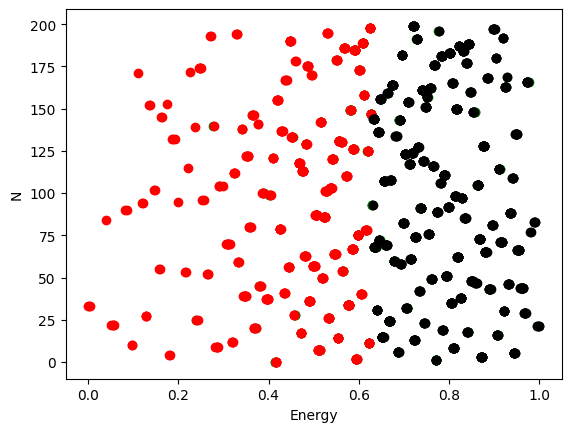

In [2398]:
df0 = musicData[musicData.cluster==0]
df1 = musicData[musicData.cluster==1]
df2 = musicData[musicData.cluster==2]

plt.scatter(df0['energy'], df0['deployment'], color='green')
plt.scatter(df1['energy'], df1['deployment'], color='red')
plt.scatter(df2['energy'], df2['deployment'], color='black')

# plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Energy')
plt.ylabel('N')

In [2399]:
# scale.fit(musicData[['energy']])
# musicData['energy'] = scale.transform(musicData[['energy']])

In [2400]:
# df0 = musicData[musicData.cluster==0]
# df1 = musicData[musicData.cluster==1]
# df2 = musicData[musicData.cluster==2]

# plt.scatter(df0['energy'], df0['deployment'], color='green')
# plt.scatter(df1['energy'], df1['deployment'], color='red')
# plt.scatter(df2['energy'], df2['deployment'], color='black')

# # plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

# plt.xlabel('energy')
# plt.ylabel('n')